# Portfolio optimization
We  consider a portfolio of stocks and find the best portfoio in that sense that it maximizes the Sharpe Ratio. 


### Importing needed libraries.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
# matplotlib inline

## Getting stock data
I have chosen five stocks from Nasdaq Helsinki for this portfolio. The stocks are
* Neste Oyj 
* Sampo Oyj
* Sanoma Corporation
* Kemira Oyj
* Nokia Corporation

The stock data I take from Yahoo and I look the stocks adjusted closing prices, because the interest in portfolio optimization lies on returns from stocks not on actual price data. 

In [6]:
tickers = ['NESTE.HE', 'SAMPO.HE', 'SAA1V.HE', 'KEMIRA.HE', 'NOKIA.HE']

In [8]:
stocks = pd.DataFrame()

for t in tickers:
    stocks[t] = web.DataReader(t, data_source='yahoo', start = '2010-1-1')['Adj Close']
    
stocks.columns = ['Neste', 'Sampo', 'Sanoma', 'Kemira', 'Nokia']
stocks.tail()

,Neste,Sampo,Sanoma,Kemira,Nokia
Date,,,,,
2020-08-28,44.799999,34.220001,10.76,11.63,4.1730
2020-08-31,44.810001,33.730000,10.86,11.58,4.0725
2020-09-01,45.099998,33.889999,10.74,11.61,3.9890
2020-09-02,46.320000,33.730000,10.84,11.59,3.9960
2020-09-03,45.439999,33.689999,10.86,11.40,3.8075


In [9]:
stocks.info() # checking data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2680 entries, 2010-01-04 to 2020-09-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Neste   2680 non-null   float64
 1   Sampo   2680 non-null   float64
 2   Sanoma  2680 non-null   float64
 3   Kemira  2680 non-null   float64
 4   Nokia   2680 non-null   float64
dtypes: float64(5)
memory usage: 125.6 KB


#### Let's plot normalized prices of these stocks so we can see how they have perfomed compared to each other.

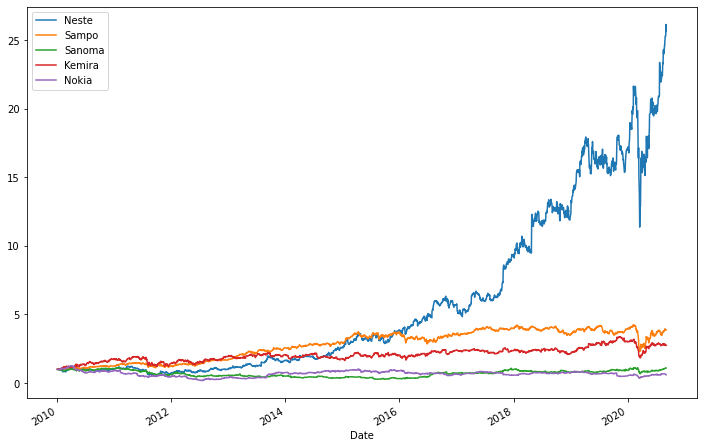

In [10]:
normalized_stocks = stocks/stocks.iloc[0]
normalized_stocks.plot(figsize =(12,8));

## Daily returns
First we calculate simple daily returns. Simple daily returns are calculated with the formula
$$r_t = \frac{p_{t}}{p_{t-1}}-1,$$
where $r_t$ is daily return at day $t$, $p_t$ is adjusted close at day $t$ and $p_{t-1}$ is adjusted close at day $t-1$.

We use these simple returns for calculating the returns. Other choice would be log returns, but since $log(x)$ is very close to $x-1$ when $x$ is close to one, they would yield results that are so close to the simple returns that in this project it doesn't have any real effect.

In [11]:
simple_daily_returns = stocks/stocks.shift(1) - 1

simple_daily_returns.head()

,Neste,Sampo,Sanoma,Kemira,Nokia
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.011811,-0.001752,0.002448,0.002830,-0.003776
2010-01-07,0.016342,0.023364,0.003663,0.006585,0.005956
2010-01-08,0.017612,0.015983,-0.006691,0.022431,-0.004306
2010-01-11,-0.007524,-0.014044,-0.002449,-0.018282,-0.015135


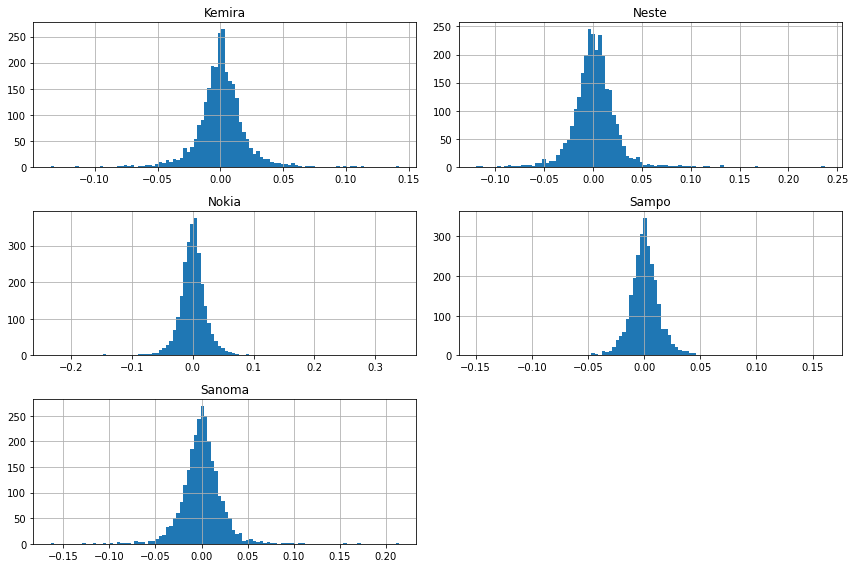

In [12]:
simple_daily_returns.hist(bins=100, figsize = (12,8))
plt.tight_layout();

In [16]:
simple_daily_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Neste,2679.0,0.001461,0.022456,-0.119686,-0.009569,0.000917,0.011993,0.236915
Sampo,2679.0,0.000616,0.014893,-0.149569,-0.006726,0.000549,0.007709,0.160653
Sanoma,2679.0,0.000279,0.022179,-0.163517,-0.010778,0.000000,0.011265,0.214222
Kemira,2679.0,0.000555,0.018921,-0.134982,-0.008321,0.000581,0.009880,0.142236
Nokia,2679.0,0.000140,0.025594,-0.233468,-0.011340,0.000510,0.011352,0.339406


#### Let's make briefly comparison to log returns.

In [17]:
log_returns = np.log(stocks/stocks.shift(1))

In [18]:
log_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Neste,2679.0,0.001211,0.022270,-0.127476,-0.009615,0.000916,0.011921,0.212620
Sampo,2679.0,0.000505,0.014891,-0.162012,-0.006748,0.000549,0.007679,0.148983
Sanoma,2679.0,0.000034,0.022143,-0.178549,-0.010837,0.000000,0.011202,0.194103
Kemira,2679.0,0.000376,0.018914,-0.145005,-0.008356,0.000580,0.009831,0.132988
Nokia,2679.0,-0.000190,0.025728,-0.265878,-0.011405,0.000510,0.011288,0.292226


Log returns yield smaller means due to the fact that since the maxs are smaller and mins are smaller (it like shifts the returns). I really would use simple returns for these stocks because I think they would yield to more realistic results especially since we count together the whole portfolios return and not just look how a single stock performs by itself.

## Making portfolio
We use Sharpe ratio to compare between portfolios. Sharpe ratio is calculated with the formula
$$
SR = \frac{R_p -R_f}{\sigma_p}, 
$$
where $SR$ stands for Sharpe Ratio, $R_p$ is portfolios return, $R_f$ is risk free return and $\sigma_p$ is the standard diviation of protfolios return and it is also called the volatility of the portfolio. A portfolio that has a bigger Sharpe Ratio is considered being better.


In [22]:
simple_daily_returns.corr()

,Neste,Sampo,Sanoma,Kemira,Nokia
Neste,1.000000,0.440352,0.289341,0.428313,0.273591
Sampo,0.440352,1.000000,0.371894,0.509269,0.386416
Sanoma,0.289341,0.371894,1.000000,0.376549,0.262748
Kemira,0.428313,0.509269,0.376549,1.000000,0.315725
Nokia,0.273591,0.386416,0.262748,0.315725,1.000000


Correlation between the returns of chosen stocks are moderate so that they are in that sense a good pick for the sake of the diversification of the portfolio.

### Evenly weighted portfolio

First let's make evenly weighted portfolio and see how it performs i.e.
* Neste Oyj  20 % 
* Sampo Oyj  20 %
* Sanoma Corporation  20 %
* Kemira Oyj  20 %
* Nokia Corporation  20 %

In [24]:
weights = np.array([.2,.2,.2,.2,.2])

##### Annual return, volatility and Sharpe ratio

In [29]:
# Here we approximate annual values from daily mean values multipling with 250, amount of business days in a year.
ret_p = np.sum(simple_daily_returns.mean()* weights)*250 
vol_p = (np.dot(weights.T,np.dot((simple_daily_returns.cov()*250),weights)))**0.5 # We use standard deviation as volatility.
sr = ret_p/vol_p  # Right now the interest rates are at zero so we use 0 as risk free return.

print("Evenly weighted portfolio:")
print(f"  Annual return: {round(ret_p*100,2)} %")
print(f"  Annual volatility: {round(vol_p*100,2)} %")
print(f"  Sharpe ratio: {round(sr,4)}")

Evenly weighted portfolio:
  Annual return: 15.26 %
  Annual volatility: 22.89 %
  Sharpe ratio: 0.6665


Since volatility for this portfolio is greater than return it is not so good portfolio.

Here is good to remember that we do calculations from values from past so that is how in average the evenly weighted portfolio performed in last 10 years period. The past doesn't necessary mean that the future would go same way.

## Optimization of portfolio
* Use scipy.optimize package to opitmize portfolio